In [75]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [76]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [77]:
NUM_CLASSES = 28

# Dataset reading

In [78]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [79]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [81]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [82]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 28)             │           308 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,378 (5.38 KB)

 Trainable params: 1,378 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [84]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [85]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
51/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0282 - loss: 3.3476       
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0468 - loss: 3.2790 - val_accuracy: 0.2024 - val_loss: 2.4659
Epoch 2/1000
52/71 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.2009 - loss: 2.3815
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2075 - loss: 2.3193 - val_accuracy: 0.4943 - val_loss: 1.6811
Epoch 3/1000
68/71 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.2775 - loss: 1.7452
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2786 - loss: 1.7424 - val_accuracy: 0.5975 - val_loss: 1.4222
Epoch 4/1000
60/71 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.3561 - loss: 1.5575
Epoch 4: saving model to model/keypoint_classifier/keypoint_classif

In [86]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.9996 - loss: 0.0529


In [87]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [88]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[4.7755576e-04 1.3667083e-01 1.1046430e-03 8.6007857e-01 1.6323422e-03
 3.5945915e-05 2.0081348e-09 1.3635567e-09 1.5475721e-09 7.3832922e-09
 5.6015064e-09 4.1944546e-09 6.5669368e-09 4.1618771e-09 5.7391127e-09
 4.0407904e-09 4.8705644e-09 8.3512059e-09 4.5192339e-09 1.3568398e-09
 7.3054873e-10 4.7801509e-09 7.2148965e-10 2.3768779e-08 1.6886156e-08
 7.6633642e-09 1.4268299e-09 2.4288518e-09]
3


# Confusion matrix

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step


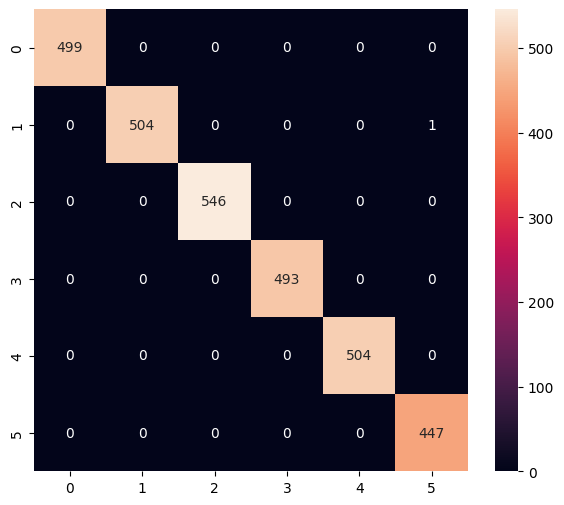

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       505
           2       1.00      1.00      1.00       546
           3       1.00      1.00      1.00       493
           4       1.00      1.00      1.00       504
           5       1.00      1.00      1.00       447

    accuracy                           1.00      2994
   macro avg       1.00      1.00      1.00      2994
weighted avg       1.00      1.00      1.00      2994



In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [90]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [91]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ISHABR~1\AppData\Local\Temp\tmpky44fmor\assets


INFO:tensorflow:Assets written to: C:\Users\ISHABR~1\AppData\Local\Temp\tmpky44fmor\assets


Saved artifact at 'C:\Users\ISHABR~1\AppData\Local\Temp\tmpky44fmor'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 28), dtype=tf.float32, name=None)
Captures:
  2033441327632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2033441337424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2033441325520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2033441327824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2033441328976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2033441326096: TensorSpec(shape=(), dtype=tf.resource, name=None)


7664

# Inference test

In [92]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [93]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [94]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [95]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [96]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.7755547e-04 1.3667087e-01 1.1046439e-03 8.6007851e-01 1.6323405e-03
 3.5945912e-05 2.0081345e-09 1.3635565e-09 1.5475690e-09 7.3832771e-09
 5.6014948e-09 4.1944466e-09 6.5669354e-09 4.1618917e-09 5.7391123e-09
 4.0407824e-09 4.8705640e-09 8.3512202e-09 4.5192246e-09 1.3568396e-09
 7.3054862e-10 4.7801501e-09 7.2148815e-10 2.3768729e-08 1.6886153e-08
 7.6633633e-09 1.4268324e-09 2.4288516e-09]
3
